In [1]:
def first(arr, n, k):
    ans = -1
    l = 0
    r = n - 1
    while l <= r:
        mid = l + (r - l) // 2
        if arr[mid] < k:
            l = mid + 1
        else:
            if arr[mid] == k:
                ans = mid
            r = mid - 1
    return ans


def last(arr, n, k):
    ans = -1
    l = 0
    r = n - 1
    while l <= r:
        mid = l + (r - l) // 2
        if arr[mid] > k:
            r = mid - 1
        else:
            if arr[mid] == k:
                ans = mid

            l = mid + 1
    return ans


def firstAndLastPosition(arr, n, k):
    f = first(arr, n, k)
    l = last(arr, n, k)
    return f, l

In [5]:
arr = [1, 3, 3, 5]

In [8]:
firstAndLastPosition(arr, 4, 5)

(3, 3)

In [ ]:
def bisect_left(a, x, lo=0, hi=None):

    if lo < 0:
        raise ValueError("lo must be non-negative")
    if hi is None:
        hi = len(a)

    while lo < hi:
        mid = (lo + hi) // 2
        if a[mid] < x:
            lo = mid + 1
        else:
            hi = mid
    return lo


def bisect_right(
    a,
    x,
    lo=0,
    hi=None,
):

    if lo < 0:
        raise ValueError("lo must be non-negative")
    if hi is None:
        hi = len(a)

    while lo < hi:
        mid = (lo + hi) // 2
        if x < a[mid]:
            hi = mid
        else:
            lo = mid + 1
    return lo

In [16]:
# User function Template for python3
# Given an array Arr of size N such that each element is from the range 0 to 9. Find the minimum possible
# sum of two numbers formed using the elements of the array. All digits in the given array must be used to form the two numbers.


class Solution:
    def solve(self, arr, n):
        num1 = 0
        num2 = 0
        arr.sort()
        for i in range(len(arr)):
            if i % 2 == 0:
                num1 = num1 * 10 + arr[i]
            elif i % 2 != 0:
                num2 = num2 * 10 + arr[i]
        return num1 + num2
        # code here

Given N candies and K people. In the first turn, the first person gets 1 candy, the second gets 2 candies, and so on till K people. In the next turn, the 

first person gets K+1 candies, the second person gets K+2 candies and so on. If the number of candies is less than the required number of candies at every

 turn, then the person receives the remaining number of candies. Find the total number of candies every person has at the end.

In [24]:
# User function Template for python3


class Solution:
    def distributeCandies(self, N, K):
        ans = [0] * K
        x = 0
        while N > 0:
            ans[x % K] += min(x + 1, N)
            x += 1
            N -= x
        return ans
        # code here

Given an array Arr[] of size N. For every element in the array, the task is to find the index of the farthest element in the array to the right which is 

smaller than the current element. If no such number exists then print -1.

In [25]:
# User function Template for python3


class Solution:
    def farNumber(self, N, Arr):
        SuffixMin = [0 for i in range(N)]
        res = []
        SuffixMin[N - 1] = Arr[N - 1]

        for i in range(N - 2, -1, -1):
            SuffixMin[i] = min(SuffixMin[i + 1], Arr[i])

        for i in range(N):
            l = i + 1
            r = N - 1
            ans = -1
            while l <= r:
                mid = l + (r - l) // 2
                if SuffixMin[mid] < Arr[i]:
                    ans = mid
                    l = mid + 1
                else:
                    r = mid - 1
            res.append(ans)
        return res

        # code here

Given an array which contains integer values, we need to make all values of this array equal to some integer value

 with minimum cost where the cost of changing an array value x to y is abs(x-y). 

In [ ]:
def minCostToMakeElementEqual(a):
    l = len(a)

    # If there are odd elements, we choose
    # middle element
    if l % 2 == 1:
        y = a[l // 2]

    # If there are even elements, then we choose
    # the average of middle two.
    else:
        y = (a[l // 2] + a[(l - 2) // 2]) // 2

    # After deciding the final value, find the
    # result.
    s = 0
    for i in range(l):
        s += abs(a[i] - y)
    return s

In [ ]:
class Solution:
    def minCost(self, nums, cost) -> int:
        """
        Returns the minimum cost to make all element of the array equal.

        Args:
            nums: List[int] = array of integers to be changed
            cost: List[int] = cost of changing each element in nums

        Returns:
            totalCost: int = the minimum cost to make the whole array equal
        """

        # We know that the final array will have only one distinct element.
        # We also know that this element is already present in the array and
        # so we can set our search range to be between the minumum and maximum
        # values of nums.
        left, right = min(nums), max(nums)

        # We just need to initialize a totalCost variable
        totalCost = 0

        # Now we Binary Search over the current range.
        while left <= right:
            # We get the midpoint. This is the value that we will
            # change all other elements in nums to.
            mid = (left + right) // 2

            # We need to calculate two values to determine the direction
            # in which the totalCost is moving
            cost1 = self.calculateCost(mid, nums, cost)
            cost2 = self.calculateCost(mid + 1, nums, cost)

            # We make our totalCost to be the minimum of the costs we
            # see
            totalCost = min(cost1, cost2)

            # If Cost1 is greater, that means that the area to the left
            # of mid is increasing and therefore the minimum cost won't be
            # found here and we can adjust our search area to the right. By
            # the same logic, we can adjust the search area to the left if
            # the area to the right of mid is increasing.
            if cost1 > cost2:
                left = mid + 1
            else:
                right = mid - 1

        # Now that we have arrived at the minimum cost, we can return the
        # result
        return totalCost

    def calculateCost(self, value: int, nums, cost) -> int:
        """
        Returns the cost of changing all elements in nums
        to value, based on the cost.

        Args:
            value: int = desired value
            nums: List[int] = array of integers
            cost: List[int] = cost of changing each element in nums
        """

        # Initialize cost to 0
        total = 0

        # For each num in nums, we get the difference between num and the
        # desired value and multiply it by its cost to get the cost of
        # changing the current element to match value.
        for num, price in zip(nums, cost):
            total += abs(num - value) * price

        # Return the total cost
        return total

In [17]:
# search in rotated sorted
def find(arr, k):

    l = 0

    r = len(arr) - 1

    while l <= r:

        mid = l + (r - l) // 2

        if arr[mid] == k:

            return mid
        if arr[l] <= arr[mid]:

            if arr[l] <= k <= arr[mid]:

                r = mid - 1

            else:

                l = mid + 1

        elif arr[mid] <= arr[r]:

            if arr[mid] <= k <= arr[r]:

                l = mid + 1

            else:

                r = mid - 1

    return -1


find(arr, k)

In [19]:
def findMin(nums) -> int:
    l = 0
    r = len(nums) - 1
    ans = 1e10
    while l <= r:
        if (
            nums[l] < nums[r]
        ):  # array is already sorted #optimization without it code will also work
            ans = min(ans, nums[l])
            break
        mid = l + (r - l) // 2
        if nums[l] <= nums[mid]:
            ans = min(ans, nums[l])
            l = mid + 1
        else:
            ans = min(ans, nums[mid])
            r = mid - 1
    return ans


findMin([3, 4, 5, 1, 2])

1

you are given an integer mountain array arr of length n where the values increase to a peak element and then decrease.

Return the index of the peak element.

In [ ]:
class Solution:
    def peakIndexInMountainArray(self, arr) -> int:
        if len(arr) == 1:
            return 0
        l = 0
        r = len(arr) - 1
        while l <= r:
            mid = l + (r - l) // 2
            if mid > 0 and mid < len(arr) - 1:
                if arr[mid - 1] < arr[mid] and arr[mid] > arr[mid + 1]:
                    return mid
            if mid > 0 and arr[mid - 1] > arr[mid]:
                r = mid - 1
            else:
                l = mid + 1

Given arrival and departure times of all trains that reach a railway station.

 Find the minimum number of platforms required for the railway station so that no train is kept waiting.

In [18]:
def minimumPlatform(arr, dep):
    arr.sort()
    dep.sort()
    n = len(arr)
    pt = 1
    result = 1
    i = 1
    j = 0
    while i < n and j < n:
        if arr[i] <= dep[j]:
            pt += 1
            i += 1
        else:
            pt -= 1
            j += 1
        if pt > result:
            result = pt
    return result

1

In [2]:
# sorted array consisting of only integers where every element appears exactly twice, except for one element which appears exactly once.
def singleNonDuplicate(nums) -> int:
    if len(nums) == 1:
        return nums[0]
    low = 0
    high = len(nums) - 1
    if nums[low] != nums[low + 1]:
        return nums[low]
    if nums[high] != nums[high - 1]:
        return nums[high]
    low = 1
    high = high - 1

    while low <= high:
        mid = low + (high - low) // 2
        if nums[mid] != nums[mid - 1] and nums[mid] != nums[mid + 1]:
            return nums[mid]
        if mid % 2 != 0:  # if index is odd
            if nums[mid] == nums[mid + 1]:
                high = mid - 1  # move left
            else:
                low = mid + 1  # move right

        else:  # if index is even
            if nums[mid] == nums[mid - 1]:
                high = mid - 1  # move left
            else:
                low = mid + 1  # move right
    return -1

In [7]:
# union intersection in sorted array
def union_intersection(a, b):
    i = 0
    j = 0
    union = []
    common = []
    while i < len(a) and j < len(b):
        if a[i] == b[j]:
            if not common or common[-1] != a[i]:
                common.append(a[i])

            if not union or union[-1] != a[i]:
                union.append(a[i])

            i += 1
            j += 1

        elif a[i] > b[j]:
            if not union or union[-1] != b[j]:
                union.append(b[j])
            j += 1

        else:
            if not union or union[-1] != a[i]:
                union.append(a[i])

            i += 1

    while i < len(a):
        if not union or union[-1] != a[i]:
            union.append(a[i])

        i += 1

    while j < len(b):
        if not union or union[-1] != b[j]:
            union.append(b[j])

        j += 1
    return union, common

In [8]:
a1 = [1, 2, 3, 4, 5]
a2 = [2, 4, 6, 8]
union_intersection(a1, a2)

([1, 2, 3, 4, 5, 6, 8], [2, 4])

In [ ]:
def FindPeakElement(arr):
    n = len(arr)  # Size of the array

    # Edge cases:
    if n == 1:
        return 0
    if arr[0] > arr[1]:
        return 0
    if arr[n - 1] > arr[n - 2]:
        return n - 1

    low = 1
    high = n - 2
    while low <= high:
        mid = (low + high) // 2

        # If arr[mid] is the peak:
        if arr[mid - 1] < arr[mid] and arr[mid] > arr[mid + 1]:
            return mid

        # If we are in the left:
        if arr[mid] > arr[mid - 1]:
            low = mid + 1

        # If we are in the right:
        # Or, arr[mid] is a common point:
        else:
            high = mid - 1

    # Dummy return statement
    return -1

you are given a sorted array A consisting of N integers. Your task is to find the magic index in the given array.

Note :
1. A magic index in an array A[0 ... N - 1] is defined to be an index i such that A[i] = i.
2. The elements in the array can be negative.
3. The elements in the array can be repeated multiple times.
4. There can be more than one magic index in an array.

In [9]:
def binarySearch(arr):
    high = len(arr) - 1
    low = 0
    if low == arr[low]:
        return low
    if high == arr[high]:
        return high

    low = 1
    high -= 1
    while low <= high:
        mid = low + (high - low) // 2
        if mid == arr[mid]:
            return mid

        if mid + 1 <= arr[high]:
            low = mid + 1
        if mid - 1 >= arr[low]:
            high = mid - 1

    # Return -1 if there is no Fixed Point
    return -1

In [10]:
binarySearch([-10, -5, 0, 3, 7])

3

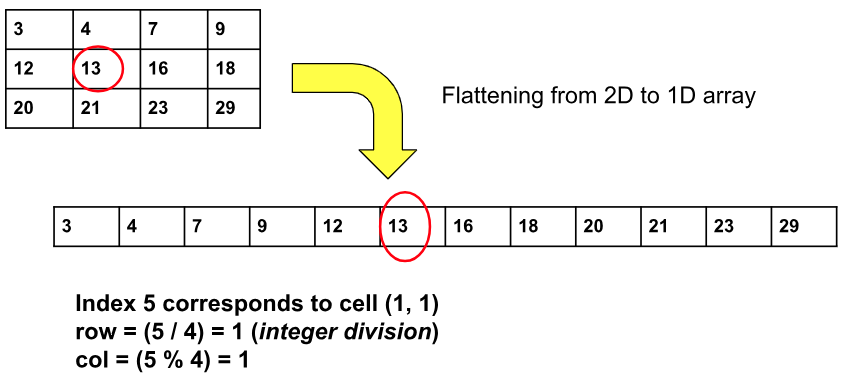

In [1]:
def searchMatrix(matrix, target):
    n = len(matrix)
    m = len(matrix[0])

    # apply binary search:
    low = 0
    high = n * m - 1
    while low <= high:
        mid = (low + high) // 2
        row = mid // m
        col = mid % m
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            low = mid + 1
        else:
            high = mid - 1
    return False


matrix = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
result = searchMatrix(matrix, 8)
print("true" if result else "false")

true


Making Two Math Equations:

Let x be the missing and y be the repeating element.

Let N is the size of the array.

Get the sum of all numbers using the formula S = N(N+1)/2

Get the sum of square of all numbers using formula SSq = N(N+1)(2N+1)/6

Iterate through a loop from i = 1….N and do the following : S -= A[i], SSq -= (A[i]*A[i])

It will give two equations 

x – y = S
x^2 – y^2 = SSq 
x + y = (SSq/S)

In [1]:
def print_two_elements(arr):
    n = len(arr)
    s = (n * (n + 1)) // 2
    ssq = (n * (n + 1) * (2 * n + 1)) // 6

    missing = 0
    repeating = 0

    for i in range(n):
        s -= arr[i]
        ssq -= arr[i] * arr[i]

    missing = (s + ssq // s) // 2
    repeating = missing - s

    print("Repeating:", repeating)
    print("Missing:", missing)


arr = [4, 3, 6, 2, 1, 6, 7]
print_two_elements(arr)

Repeating: 6
Missing: 5


In [2]:
# Python Program to demonstrate working of an algorithm that finds
# an element in an array of infinite size


# Binary search algorithm implementation
def binary_search(arr, l, r, x):

    if r >= l:
        mid = l + (r - l) // 2

        if arr[mid] == x:
            return mid

        if arr[mid] > x:
            return binary_search(arr, l, mid - 1, x)

        return binary_search(arr, mid + 1, r, x)

    return -1


# function takes an infinite size array and a key to be
# searched and returns its position if found else -1.
# We don't know size of a[] and we can assume size to be
# infinite in this function.
# NOTE THAT THIS FUNCTION ASSUMES a[] TO BE OF INFINITE SIZE
# THEREFORE, THERE IS NO INDEX OUT OF BOUND CHECKING
def findPos(a, key):

    l, h, val = 0, 1, arr[0]

    # Find h to do binary search
    while val < key:
        l = h  # store previous high
        h = 2 * h  # double high index
        val = arr[h]  # update new val

    # at this point we have updated low and high indices,
    # thus use binary search between them
    return binary_search(a, l, h, key)


# Driver function
arr = [3, 5, 7, 9, 10, 90, 100, 130, 140, 160, 170]
ans = findPos(arr, 10)
if ans == -1:
    print("Element not found")
else:
    print("Element found at index", ans)

Element found at index 4


Let p be the position of element to be searched. Number of steps for finding high index ‘h’ is O(Log p). 

The value of ‘h’ must be less than 2*p. The number of elements between h/2 and h must be O(p). 

Therefore, time complexity of Binary Search step is also O(Log p) and overall time complexity is 2*O(Log p) which is O(Log p

each row of the matrix is sorted in non-decreasing order, and each column is sorted in non-decreasing order.

In [3]:
def search(mat, k):
    r = len(mat)
    c = len(mat[0])
    i = 0
    j = c - 1
    while i < r and j >= 0:
        if mat[i][j] == k:
            return True

        if mat[i][j] > k:
            j -= 1
        else:
            i += 1
    return False

For each element ‘q’ in the array 'queries', your task is to find the sum of all elements in the array ‘arr’ which are less than or equal to ‘q’.

In [18]:
def search(arr, qq):
    l = 0
    r = len(arr) - 1
    ans = -1
    while l <= r:
        mid = l + (r - l) // 2
        if arr[mid] > qq:
            r = mid - 1
        else:
            ans = mid
            l = mid + 1
    return ans


def searchInTheArray(arr, queries, n, q):
    tsum = [0] * (n + 1)
    for i in range(1, n + 1):
        tsum[i] = tsum[i - 1] + arr[i - 1]

    ans = []
    for qq in queries:
        index = search(arr, qq)
        if index != -1:
            ans.append(tsum[index + 1])
        else:
            ans.append(0)
    return ans


arr = [2, 3, 3, 4, 6, 7]
q = [2, 4]
search(arr, q[0])

0

In [1]:
def sortInWave(arr, n):

    # Traverse all even elements
    for i in range(0, n, 2):

        # If current even element is smaller than previous
        if i > 0 and arr[i] < arr[i - 1]:
            arr[i], arr[i - 1] = arr[i - 1], arr[i]

        # If current even element is smaller than next
        if i < n - 1 and arr[i] < arr[i + 1]:
            arr[i], arr[i + 1] = arr[i + 1], arr[i]
    return arr

You are also given an integer 'k' which denotes the number of aggressive cows.

You are given the task of assigning stalls to 'k' cows such that the minimum distance between any two of them is the maximum possible.

In [ ]:
# User function Template for python3
def possible(n, k, stalls, mid):
    c = 1
    d = stalls[0]
    for i in range(1, n):
        if abs(stalls[i] - d) >= mid:
            c += 1
            d = stalls[i]
    if c >= k:
        return True
    return False


class Solution:
    def solve(self, n, k, stalls):
        stalls.sort()
        s, e = 1, (stalls[n - 1] - stalls[0])
        ans = -1
        while s <= e:
            mid = s + (e - s) // 2
            if possible(n, k, stalls, mid):
                ans = max(ans, mid)
                s = mid + 1
            else:
                e = mid - 1
        return ans

The problem is to find the minimum time to get this job done if all painters start together with the constraint that any painter will only paint continuous

 boards, say boards numbered {2,3,4} or only board {1} or nothing but not boards {2,4,5}.

In [ ]:
def count_painter(arr, mid, k):
    curr = 1
    clen = 0
    for x in arr:
        if clen + x <= mid:

            clen += x
        else:
            curr += 1
            clen = x

    return curr <= k


def search(arr, k):
    r = sum(arr)
    l = max(arr)
    # if k==len(arr):
    #     return max(arr)
    # elif k==1:
    #     return sum(arr)
    ans = -1
    while l <= r:
        mid = l + (r - l) // 2
        if count_painter(arr, mid, k):
            ans = mid
            r = mid - 1
        else:
            l = mid + 1
    return ans


def findLargestMinDistance(boards: list, k: int):
    return search(boards, k)
    # Write your code here
    # Return an integer


# n = 5, k = 3, arr[] = {5,10,30,20,15}
# Output: 35
# Explanation: The most optimal way will be: Painter 1 allocation : {5,10},
# Painter 2 allocation : {30}, Painter 3 allocation : {20,15}, Job will be done when all painters finish i.e. at time = max(5+10, 30, 20+15) = 35

ou want to make m bouquets. To make a bouquet, you need to use k adjacent flowers from the garden.

The garden consists of n flowers, the ith flower will bloom in the bloomDay[i] and then can be used in exactly one bouquet.

Return the minimum number of days you need to wait to be able to make m bouquets from the garden. If it is impossible to make m bouquets return -1.

 

Example 1:

Input: bloomDay = [1,10,3,10,2], m = 3, k = 1
Output: 3

In [ ]:
def canMakeBouquets(bloomDay, days, m, k) -> bool:
    ans, cnt = 0, 0

    for day in bloomDay:
        if day <= days:
            cnt += 1
        else:
            cnt = 0

        if cnt == k:
            ans += 1
            cnt = 0
    return ans >= m


class Solution:
    def minDays(self, bloomDay, m: int, k: int) -> int:
        l, r = min(bloomDay), max(bloomDay)
        ans = -1
        while l <= r:
            mid = l + (r - l) // 2
            if canMakeBouquets(bloomDay, mid, m, k):
                ans = mid
                r = mid - 1
            else:
                l = mid + 1
        return ans

he weights of the packages are given in an array 'weights'. The packages are loaded on the conveyor belts every day in the same order as they appear in the array. The loaded weights must not exceed the maximum weight capacity of the ship.



Find out the least-weight capacity so that you can ship all the packages within 'd' days.

In the test case, the given weights are [5,4,5,2,3,4,5,6]
and these are needed to be shipped in 5 days.

In [ ]:
from os import *
from sys import *
from collections import *
from math import *


def possible(w, mid, d):
    curr = 0
    days = 1
    for x in w:
        if x + curr <= mid:
            curr += x
        else:
            days += 1
            curr = x
    return days <= d


def leastWeightCapacity(weights, d):
    r = sum(weights)
    l = max(weights)
    ans = -1

    while l <= r:
        mid = l + (r - l) // 2
        if possible(weights, mid, d):
            ans = mid
            r = mid - 1
        else:
            l = mid + 1
    return ans

Given an integer array nums and an integer k, split nums into k non-empty subarrays such that the largest sum of any subarray is minimized.

Return the minimized largest sum of the split.

A subarray is a contiguous part of the array.

In [11]:
def is_possible(nums, maxSum):
    partitions = 1
    subSum = 0
    for num in nums:
        if subSum + num <= maxSum:
            subSum += num
        else:
            partitions += 1
            subSum = num
    return partitions


def splitArray(nums, k: int) -> int:
    left = max(nums)
    right = sum(nums)
    ans = right
    while left <= right:
        mid = (left + right) // 2
        p = is_possible(nums, mid)
        if p > k:
            left = mid + 1

        else:
            # if p==k:
            #     ans = min(mid ,ans)
            ans = mid
            right = mid - 1
    return ans


# Input: nums = [7,2,5,10,8], k = 2
# Output: 18
# Explanation: There are four ways to split nums into two subarrays.
# The best way is to split it into [7,2,5] and [10,8], where the largest sum among the two subarrays is only 18.
nums = [7, 2, 5, 10, 8]
k = 2
splitArray(nums, k)

18

Ninja bought chocolate consisting of some chunks. The sweetness of each chunk is given in an array ‘ARR’. Ninja has ‘K’ friends, and he wishes to divide

 the chocolate into 'K' + 1 cut with some consecutive chunks. He wants to divide the chocolate into chunks under the condition that he will take the piece 
 
 that has the minimum total sweetness.

In [18]:
arr = [5, 6, 7, 8, 9, 10, 11, 12, 13]


def check(mini, arr, n):
    count = 0
    sum_ = 0
    for i in range(n):
        sum_ += arr[i]
        if sum_ >= mini:
            count += 1
            sum_ = 0
    return count


def maxSweetness(arr, N, K):
    low = float("inf")
    high = 0
    ans = 0
    for i in range(N):
        low = min(low, arr[i])
        high += arr[i]
    while low <= high:
        mid = (low + high) // 2
        if check(mid, arr, N) >= (K + 1):
            ans = mid
            low = mid + 1
        else:
            high = mid - 1
    return ans


k = 3
maxSweetness(arr, len(arr), k)
# [5, 6, 7, 8, 9, 10, 11, 12, 13] and Ninja has 3 friends. So, it is to be divided among 4 people including Ninja himself.
# In order to maximize the total sweetness of Ninja, one possible division is [5, 6, 7], [8, 9], [10, 11], [12, 13].
# The minimum sweetness of one part is 17. So, the answer is 17.

17

Your task is to determine the minimum number of elements that should be removed from the array such that the difference between the maximum and the minimum 

element in the remaining array is less than or equal to K.

In [19]:
# minimum removals to
# make max-min <= K
MAX = 100
dp = [[0 for i in range(MAX)] for i in range(MAX)]
for i in range(0, MAX):
    for j in range(0, MAX):
        dp[i][j] = -1


# function to check all
# possible combinations
# of removal and return
# the minimum one
def countRemovals(a, i, j, k):

    global dp

    # base case when all
    # elements are removed
    if i >= j:
        return 0

    # if condition is satisfied,
    # no more removals are required
    elif (a[j] - a[i]) <= k:
        return 0

    # if the state has
    # already been visited
    elif dp[i][j] != -1:
        return dp[i][j]

    # when Amax-Amin>d
    elif (a[j] - a[i]) > k:

        # minimum is taken of
        # the removal of minimum
        # element or removal of
        # the maximum element
        dp[i][j] = 1 + min(countRemovals(a, i + 1, j, k), countRemovals(a, i, j - 1, k))
    return dp[i][j]


# To sort the array
# and return the answer
def removals(a, n, k):

    # sort the array
    a.sort()

    # fill all stated
    # with -1 when only
    # one element
    if n == 1:
        return 0
    else:
        return countRemovals(a, 0, n - 1, k)


# Driver Code
a = [1, 3, 4, 9, 10, 11, 12, 17, 20]
n = len(a)
k = 4
print(removals(a, n, k))

5


In [20]:
# Python program for the above approach
def removal(a, n, k):
    # sort the array
    a.sort()
    # to store the max length of
    # array with difference <= k
    maxLen = 0
    # pointer to keep track of starting of each subarray
    i = 0
    for j in range(0, n):
        # if the subarray from i to j index is valid
        # the store it's length
        if a[j] - a[i] <= k:
            maxLen = max(maxLen, j - i + 1)
        # if subarray difference exceeds k
        # change starting position, i.e. i
        else:
            i = i + 1

        if i >= n:
            break
    remove = n - maxLen
    return remove


# Driver Code
a = [1, 3, 4, 9, 10, 11, 12, 17, 20]
n = len(a)
k = 4

print(removal(a, n, k))

5


Given two sorted arrays arr1 and arr2 of size m and n respectively, return the median of the two sorted arrays.

In [21]:
def median(a, b):
    # size of two given arrays:
    n1, n2 = len(a), len(b)
    n = n1 + n2  # total size
    # required indices:
    ind2 = n // 2
    ind1 = ind2 - 1
    cnt = 0
    ind1el, ind2el = -1, -1

    # apply the merge step:
    i, j = 0, 0
    while i < n1 and j < n2:
        if a[i] < b[j]:
            if cnt == ind1:
                ind1el = a[i]
            if cnt == ind2:
                ind2el = a[i]
            cnt += 1
            i += 1
        else:
            if cnt == ind1:
                ind1el = b[j]
            if cnt == ind2:
                ind2el = b[j]
            cnt += 1
            j += 1

    # copy the left-out elements:
    while i < n1:
        if cnt == ind1:
            ind1el = a[i]
        if cnt == ind2:
            ind2el = a[i]
        cnt += 1
        i += 1
    while j < n2:
        if cnt == ind1:
            ind1el = b[j]
        if cnt == ind2:
            ind2el = b[j]
        cnt += 1
        j += 1

    # Find the median:
    if n % 2 == 1:
        return float(ind2el)

    return float(ind1el + ind2el) / 2.0


if __name__ == "__main__":
    a = [1, 4, 7, 10, 12]
    b = [2, 3, 6, 15]
    print("The median of two sorted arrays is", "{:.1f}".format(median(a, b)))

The median of two sorted arrays is 6.0


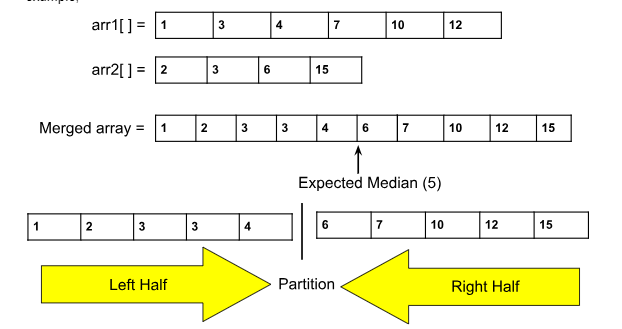

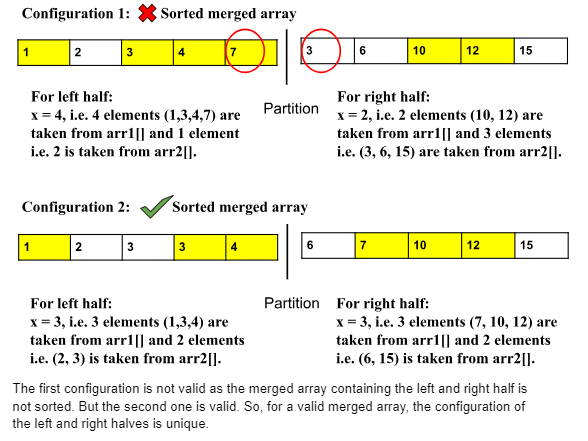

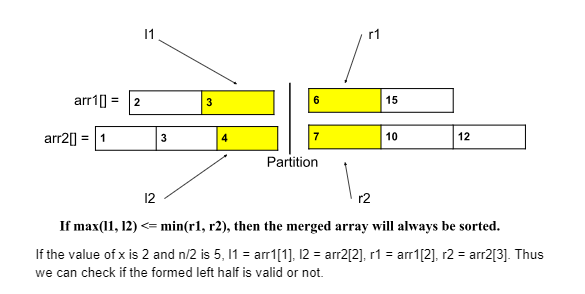


How to check if the merged array is sorted without forming the array:

In order to check we will consider 4 elements, i.e. l1, l2, r1, r2.

l1 = the maximum element belonging to arr1[] of the left half.

l2 = the maximum element belonging to arr2[] of the left half.

r1 = the minimum element belonging to arr1[] of the right half.

r1 = the minimum element belonging to arr2[] of the right half.

Eliminate the halves based on the following conditions:

If l1 <= r2 && l2 <= r1: We have found the answer.
If (n1+n2) is odd: Return the median = max(l1, l2).
Otherwise: Return median = (max(l1, l2)+min(r1, r2)) / 2.0

If l1 > r2: This implies that we have considered more elements from arr1[] than necessary. So, we have to take less elements from arr1[] and more from arr2
[]. In such a scenario, we should try smaller values of x. To achieve this, we will eliminate the right half (high = mid1-1).

If l2 > r1: This implies that we have considered more elements from arr2[] than necessary. So, we have to take less elements from arr2[] and more from arr1[]. In such a scenario, we should try bigger values of x. To achieve this, we will eliminate the left half (low = mid1+1).

In [22]:
def median(a, b):
    n1, n2 = len(a), len(b)
    # if n1 is bigger swap the arrays:
    if n1 > n2:
        return median(b, a)

    n = n1 + n2  # total length
    left = (n1 + n2 + 1) // 2  # length of left half
    # apply binary search:
    low, high = 0, n1
    while low <= high:
        mid1 = (low + high) // 2
        mid2 = left - mid1
        # calculate l1, l2, r1, and r2;
        l1, l2, r1, r2 = float("-inf"), float("-inf"), float("inf"), float("inf")
        if mid1 < n1:
            r1 = a[mid1]
        if mid2 < n2:
            r2 = b[mid2]
        if mid1 - 1 >= 0:
            l1 = a[mid1 - 1]
        if mid2 - 1 >= 0:
            l2 = b[mid2 - 1]

        if l1 <= r2 and l2 <= r1:
            if n % 2 == 1:
                return max(l1, l2)
            else:
                return (float(max(l1, l2)) + float(min(r1, r2))) / 2.0

        # eliminate the halves:
        elif l1 > r2:
            high = mid1 - 1
        else:
            low = mid1 + 1
    return 0  # dummy statement


a = [1, 4, 7, 10, 12]
b = [2, 3, 6, 15]
print("The median of two sorted arrays is {:.1f}".format(median(a, b)))

The median of two sorted arrays is 6.0


https://takeuforward.org/data-structure/k-th-element-of-two-sorted-arrays/

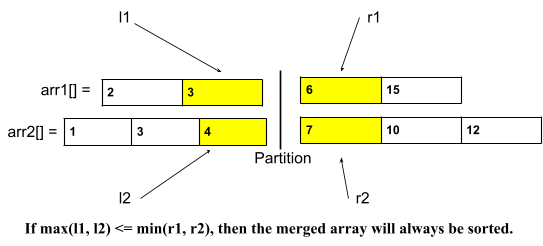

Place the 2 pointers i.e. low and high: Initially, we will place the pointers. The pointer low will point to max(0, k-n2), and the high will point to min

(k, n1) (i.e. n1 = The size of the smaller array, n2 = the size of the bigger array).

In [23]:
def kthElement(a, b, m, n, k):
    if m > n:
        return kthElement(b, a, n, m, k)

    left = k  # length of left half

    # apply binary search:
    low = max(0, k - n)
    high = min(k, m)
    while low <= high:
        mid1 = (low + high) // 2
        mid2 = left - mid1
        # calculate l1, l2, r1, and r2
        l1 = float("-inf")
        l2 = float("-inf")
        r1 = float("inf")
        r2 = float("inf")
        if mid1 < m:
            r1 = a[mid1]
        if mid2 < n:
            r2 = b[mid2]
        if mid1 - 1 >= 0:
            l1 = a[mid1 - 1]
        if mid2 - 1 >= 0:
            l2 = b[mid2 - 1]

        if l1 <= r2 and l2 <= r1:
            return max(l1, l2)

        # eliminate the halves:
        elif l1 > r2:
            high = mid1 - 1
        else:
            low = mid1 + 1

    return 0  # dummy statement


a = [2, 3, 6, 7, 9]
b = [1, 4, 8, 10]
print("The k-th element of two sorted arrays is:", kthElement(a, b, len(a), len(b), 5))

The k-th element of two sorted arrays is: 6


The task is to split the array into minimum number of strictly decreasing subsequences.

Calculate the minimum number of subsequences we can get by splitting.

If we observe carefully, we can see that the Minimum number of decreasing subsequences is equal to the length of longest increasing subsequence
where each element from the longest
increasing subsequence belongs to a single decreasing subsequence, so it can be found in N*Log(N).

In [ ]:
class Solution:
    # Function to find the length of the minimum decreasing subsequence.
    def min_decreasing_sub(self, N, arr):
        # Initialize a list to store the elements of the decreasing subsequence.
        seq = [arr[0]]

        # Iterate through the array starting from the second element.
        for i in range(1, N):
            # Find the position where the current element should be inserted in the sequence.
            ind = self.binary_search(seq, arr[i])

            # If the position is equal to the size of the sequence, add the element to the end.
            if ind == len(seq):
                seq.append(arr[i])
            # Otherwise, replace the element at the found position with the current element.
            else:
                seq[ind] = arr[i]

        # Return the size of the sequence as the result.
        return len(seq)

    # Custom binary search function
    def binary_search(self, seq, target):
        low, high = 0, len(seq)

        while low < high:
            mid = (low + high) // 2

            if seq[mid] < target:
                low = mid + 1
            else:
                high = mid

        return low


# Example usage
arr = [5, 2, 7, 8, 6]
N = len(arr)

solution = Solution()
result = solution.min_decreasing_sub(N, arr)

# Display the result.
print("Length of the minimum decreasing subsequence:", result)

In [30]:
# Python3 implementation of the approach


# Function to return the minimum number of
# increment operations required to make
# any k elements of the array equal
def minOperations(ar, k):

    # Sort the array in increasing order
    ar = sorted(ar)

    # Calculate the number of operations
    # needed to make 1st k elements equal to
    # the kth element i.e. the 1st window
    opsNeeded = 0
    for i in range(k):
        opsNeeded += ar[k - 1] - ar[i]

    # Answer will be the minimum of all
    # possible k sized windows
    ans = opsNeeded

    # Find the operations needed to make
    # k elements equal to ith element
    for i in range(k, len(ar)):

        # Slide the window to the right and
        # subtract increments spent on leftmost
        # element of the previous window
        opsNeeded = opsNeeded - (ar[i - 1] - ar[i - k])

        # Add increments needed to make the 1st k-1
        # elements of this window equal to the
        # kth element of the current window
        opsNeeded += (k - 1) * (ar[i] - ar[i - 1])
        ans = min(ans, opsNeeded)

    return ans


# Driver code
arr = [3, 1, 9, 100]
n = len(arr)
k = 3

print(minOperations(arr, k))

# This code is contributed by Mohit Kumar

14


In [3]:
a = [3, 3, 4, 5, 6]


def solve(i, a, ans, prev):
    if len(ans) == 3:
        print(ans)
        return
    if i >= len(a):
        return
    if prev == -1 or prev < a[i]:
        ans.append(a[i])
        solve(i + 1, a, ans, a[i])
        ans.pop()
    solve(i + 1, a, ans, prev)


solve(0, a, [], -1)

[3, 4, 5]
[3, 4, 6]
[3, 5, 6]
[3, 4, 5]
[3, 4, 6]
[3, 5, 6]
[4, 5, 6]


In [ ]:
def solve(i, a, ans, prev, dp):
    if ans == 3:
        return 1
    if i >= len(a):
        return 0
    if (i, prev, ans) in dp:
        return dp[(i, prev, ans)]
    inc = 0
    if prev == -1 or prev < a[i]:

        inc = solve(i + 1, a, ans + 1, a[i], dp)
    exc = solve(i + 1, a, ans, prev, dp)
    dp[(i, prev, ans)] = inc + exc
    return dp[(i, prev, ans)]


def solve_(arr, n):
    #  Variable to store the count of required triplet of people.
    count = 0

    #  Iterate through the "arr".
    for i in range(n):

        #  Variables to store the left and right count of people having heights less and more, respectively.
        left, right = 0, 0

        #  Again, iterate.
        for j in range(n):

            #  Check the required conditions for "left" and If found true then increment its value by 1.
            if j < i and arr[j] < arr[i]:
                left = left + 1

            #  Check the required conditions for "right" and If found true then increment its value by 1.
            if j > i and arr[j] > arr[i]:
                right = right + 1

        #  Increment the "count" by the number of triplets possible when the middle person is always arr[i].
        count = count + left * right

    #  Return the count.
    return count


# the selection can be made as [1, 2, 3], [1, 2, 4], [1, 3, 4], and [2, 3, 4] for [1,2,3,4]